In [4]:
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
r = requests.get("http://glenecho.stream:8080/list").json()

In [116]:
humidity = [i for i in r if i['measurement'] == 'humidity']
absolute_humidity = [i for i in r if i['measurement'] == 'absolute_humidity']
temp = [i for i in r if i['measurement'] == 'temperature' and i['sensor'] == 'bme680']
pressure = [i for i in r if i['measurement'] == 'pressure']
air = [i for i in r if i['measurement'] == 'gas_resistance']
depth = [i for i in r if i['measurement'] == 'depth']

In [117]:
humidity_value = np.array([i['value'] for i in humidity])
humidity_time = np.array([i['timestamp'] for i in humidity])
temp = np.array([i['value'] for i in temp])
pressure = np.array([i['value'] for i in pressure])
air_value = np.array([i['value'] for i in air])
air_time = np.array([i['timestamp'] for i in air])
depth = np.array([i['value'] for i in depth])
absolute_humidity = np.array([i['value'] for i in absolute_humidity])

(10.5, 13.5)

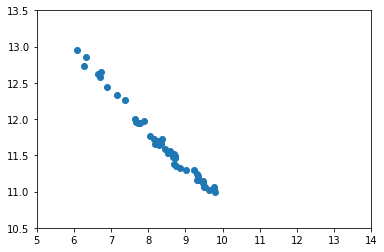

In [57]:

plt.scatter(absolute_humidity[500:500+50], np.log(air_value[500:500+50]))
plt.xlim([5, 14])
plt.ylim([10.5, 13.5])

In [25]:
import scipy.stats

In [60]:
for i in range(40):
    offset = i * 25
    regress = scipy.stats.linregress(absolute_humidity[offset:offset+50], np.log(air_value[offset:offset+50]))
    if (regress.rvalue**2 > 0.6):
        print(offset)
        print(regress.slope, regress.intercept, regress.rvalue**2)

0
(-0.8004073838025771, 19.79319301037074, 0.8050542157575973)
100
(-0.23112912443394548, 13.732953951527051, 0.8760314339275924)
175
(-0.14525263773881875, 12.794578099583648, 0.7336448119254712)
325
(-0.3176123823473712, 14.165611588171958, 0.716007867152779)
350
(-0.5702550439633481, 15.906722481262415, 0.8484253024453171)
375
(-0.27617300985585835, 13.7757893415965, 0.7133847040932935)
450
(-0.842925853756705, 18.00608136379243, 0.6845390074594049)
475
(-0.5447896856752955, 16.111531521066865, 0.7185216899437274)
500
(-0.5276719332956944, 16.086657918718224, 0.9861786285315916)
525
(-0.4574264645955697, 15.550376231507796, 0.8365849491558203)
550
(-0.26787462799685535, 14.021859990238074, 0.7105219943028608)
625
(-0.05712317418077348, 11.669426779676051, 0.6081043705945822)
650
(0.19695304349504775, 8.263786632407742, 0.791781566459365)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [63]:
scipy.stats.linregress(absolute_humidity[:600], np.log(air_value[:600]))

LinregressResult(slope=-0.21747856090248932, intercept=13.652655460958453, rvalue=-0.49729747618050696, pvalue=8.389654472566745e-39, stderr=0.01551526445474296)

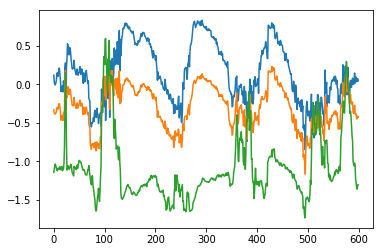

In [105]:
plt.plot(np.log(air_value[:600]) - (humidity_value[:600] * -0.06568911456870866 + 17.20480030645947))
plt.plot(np.log(air_value[:600]) - (humidity_value[:600] * -0.04557760735953077 + 15.977729131340379))
plt.plot(np.log(air_value[:600]) - 13)

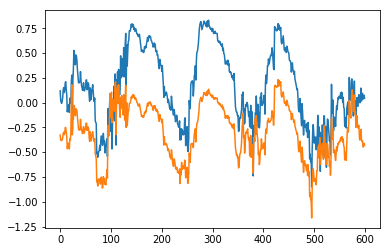

In [104]:
plt.plot(np.log(air_value[:600]))
plt.plot(np.log(air_value[:600]) - (humidity_value[:600] * -0.06568911456870866 + 17.20480030645947))
plt.plot(np.log(air_value[:600]) - (humidity_value[:600] * -0.04557760735953077 + 15.977729131340379))

In [40]:
import pandas as pd

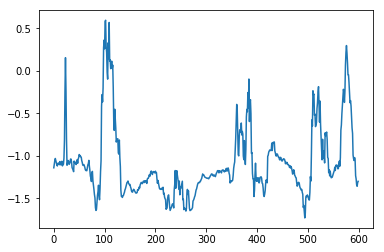

In [109]:
#plt.plot(np.log(air_value[:600]) - (absolute_humidity[:600] * -0.5276719332956944 + 16.086657918718224))
#plt.plot(np.log(air_value[:600]) - (absolute_humidity[:600] * -0.21747856090248932 + 13.652655460958453))

plt.plot(np.log(air_value[:600]) - 13)

In [49]:
air_time[600]

u'2019-01-21T19:15:37.93333Z'

In [50]:
humidity_time[600]

u'2019-01-21T19:15:37.330998Z'

In [72]:
df = pd.DataFrame([i for i in r if i['measurement'] == 'max_volume'])

In [74]:
df['time'] = pd.to_datetime(df['timestamp'])

In [76]:
df.index = df['time']

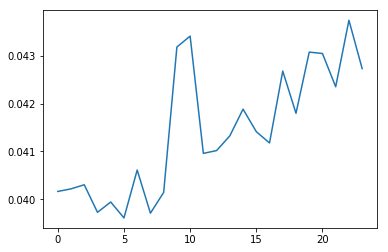

In [99]:
plt.plot(df.groupby((df.index.hour + 17) % 24).median()['value'])

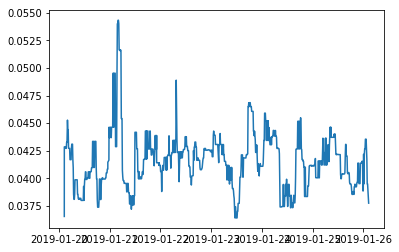

In [95]:
plt.plot(df['time'],scipy.signal.medfilt(df['value'], 17))

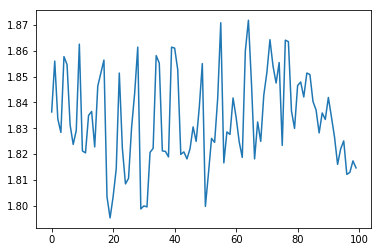

In [119]:
plt.plot(depth[:100])